In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv("Data/train.csv")
data_C = data.copy()
print(data.shape)
data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# DATA
data = data_C
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [7]:
def init_params():
     w1 = np.random.rand(10, 784)
     b1 = np.random.rand(10, 1)
     w2 = np.random.rand(10, 10)
     b2 = np.random.rand(10, 1)
     return w1, b1, w2, b2

def ReLU(z):
     return np.maximum(0, z)

def sigmoid(z):
     return 1 / (1 + np.exp(-z))

def forward_prop(w1, b1, w2, b2, X):
     z1 = w1.dot(X) + b1
     a1 = ReLU(z1)
     z2 = w2.dot(a1) + b2
     a2 = sigmoid(z2)
     return z1, a1, z2, a2

def one_hot(y):
     one_hot_Y = np.zeros((y.size, y.max() + 1))
     one_hot_Y[np.arange(y.size), y] = 1
     one_hot_Y = one_hot_Y.T
     return one_hot_Y

def deriv_ReLU(z):
     return z > 0
def deriv_sigmoid(z):  
     return sigmoid(z) * (1 - sigmoid(z))

def back_prop(z1, a1, z2, a2, w2, x, y):
     np.set_printoptions(formatter={'float':'{:.5f}'.format})
     m = y.size
     yr = one_hot(y)
     cost = (a2 - yr)
     db2  = 1/m * np.sum(cost, axis=1).reshape(-1, 1)
     dw2 = 1/m * cost.dot(a1.T)
     dE1 = w2.T.dot(cost) * deriv_ReLU(z1)
     db1  = 1/m * np.sum(dE1, axis=1).reshape(-1, 1)
     dw1 = 1/m * dE1.dot(x.T)
     return dw1, db1 ,dw2 ,db2

def update_params(w1, b1, w2, b2, dw1, db1 ,dw2 ,db2, alpha):
     w1 = w1 - alpha * dw1
     b1 = b1 - alpha * db1
     w2 = w2 - alpha * dw2
     b2 = b2 - alpha * db2
     return w1, b1, w2, b2
     

In [8]:
def get_accuracy(predictions, y):
     return np.sum(predictions == y) / y.size

def get_predictions(a2):
     return np.argmax(a2, 0)

def gradient_descent(x, y, iterations, alpha):
     w1, b1 ,w2, b2 = init_params()
     for i in range(iterations):
          z1, a1, z2, a2, = forward_prop(w1, b1, w2, b2, x)
          dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
          w1, b1 ,w2, b2 = update_params(w1, b1, w2, b2, dw1, db1 ,dw2 ,db2, alpha)
          if i % 50 == 0:
               print("Iteration:", i)
               crnt_accuracy = get_accuracy(get_predictions(a2), y)*100
               crnt_accuracy_fomt = '{:.2f}'.format(crnt_accuracy)
               print("accuracy with train data: ",crnt_accuracy_fomt, "%")
               print("accuracy with dev data: ",crnt_accuracy_fomt, "%\n")
     return w1, b1, w2, b2

In [9]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 800, 0.05)

Iteration: 0
accuracy with train data:  9.84 %
accuracy with dev data:  9.84 %



C:\Users\Sayan\AppData\Local\Temp\ipykernel_21028\62906872.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration: 50
accuracy with train data:  36.76 %
accuracy with dev data:  36.76 %

Iteration: 100
accuracy with train data:  53.58 %
accuracy with dev data:  53.58 %

Iteration: 150
accuracy with train data:  62.62 %
accuracy with dev data:  62.62 %

Iteration: 200
accuracy with train data:  67.80 %
accuracy with dev data:  67.80 %

Iteration: 250
accuracy with train data:  73.09 %
accuracy with dev data:  73.09 %

Iteration: 300
accuracy with train data:  76.27 %
accuracy with dev data:  76.27 %

Iteration: 350
accuracy with train data:  76.60 %
accuracy with dev data:  76.60 %

Iteration: 400
accuracy with train data:  78.99 %
accuracy with dev data:  78.99 %

Iteration: 450
accuracy with train data:  79.86 %
accuracy with dev data:  79.86 %

Iteration: 500
accuracy with train data:  80.62 %
accuracy with dev data:  80.62 %

Iteration: 550
accuracy with train data:  81.60 %
accuracy with dev data:  81.60 %

Iteration: 600
accuracy with train data:  82.42 %
accuracy with dev data:  82

In [10]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions
def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def false_predictions(w1, b1, w2, b2):
    values = []
    for index in range(X_train.shape[1]):
         prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
         label = Y_train[index]
         if prediction[0] != label:
             values.append(index)
    return values
         

Prediction:  [6]
Label:  6


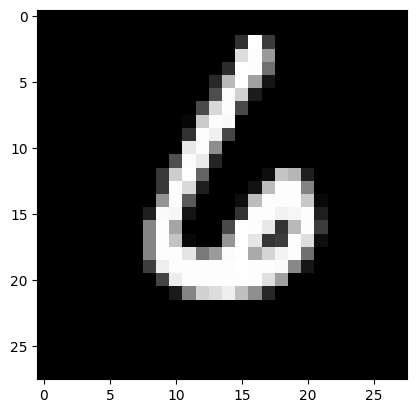

In [11]:
test_prediction(100, w1, b1, w2, b2)
#test_prediction(1, w1, b1, w2, b2)
#test_prediction(2, w1, b1, w2, b2)
#test_prediction(3, w1, b1, w2, b2)

In [12]:
false_val = false_predictions(w1, b1, w2, b2)
print(false_val)

[5, 7, 8, 15, 18, 26, 42, 55, 57, 61, 72, 80, 96, 97, 102, 107, 121, 134, 139, 149, 154, 158, 161, 165, 177, 179, 183, 186, 198, 223, 242, 245, 255, 264, 267, 275, 279, 291, 292, 294, 301, 305, 307, 318, 324, 336, 339, 342, 344, 349, 351, 355, 356, 365, 368, 373, 380, 385, 387, 394, 398, 400, 407, 408, 415, 428, 443, 447, 450, 452, 453, 460, 478, 486, 493, 502, 506, 520, 523, 541, 553, 566, 575, 580, 582, 583, 588, 604, 606, 608, 614, 615, 618, 625, 638, 657, 661, 668, 670, 683, 685, 693, 696, 697, 705, 710, 716, 723, 727, 742, 756, 759, 767, 771, 772, 784, 785, 787, 789, 793, 795, 798, 802, 804, 809, 811, 813, 814, 819, 822, 826, 834, 835, 866, 884, 885, 887, 894, 896, 904, 905, 921, 929, 932, 938, 944, 945, 947, 949, 950, 959, 961, 966, 979, 980, 985, 1001, 1004, 1015, 1019, 1039, 1045, 1048, 1067, 1072, 1073, 1075, 1078, 1081, 1091, 1096, 1105, 1117, 1126, 1141, 1150, 1151, 1153, 1160, 1166, 1184, 1185, 1191, 1196, 1197, 1202, 1214, 1215, 1216, 1227, 1230, 1232, 1245, 1253, 1254, 12

In [13]:
Y_train.shape

(41000,)